#### Problem Statement:
- The ‘Life Expectancy’ dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. It is our aim to study how these various factors impact the average life expectancy in the given countries

- Variable information:
- Country: Name of the country
- Status: Whether the country is Developed or Developing
- Adult_Mortality: Mortality rate for age group 15-60 out of every 1000 individuals of the population
- Infant_Deaths: Number of infant deaths per 1000 population
- Hepatitis: Hepatitis B (HepB) immunization coverage for 1-year olds (Percentage)
- Measles: Number of reported cases for measles per 1000 from population
- BMI: Average Body Mass Index for entire population
- Underfive_Deaths: Number of deaths under 5 years of age per 1000 population
- Polio: Polio (Pol3) immunization coverage for 1-year olds (Percentage)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1-year olds (Percentage)
- HIV: Deaths per 1000 live births due to HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- Malnourished10_19: Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)
- Malnourished5_9: Prevalence of malnutrition among children for Age 5 to 9 (Percentage)
- Income_Index: Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)
- Schooling: Number of years of Schooling
- Life_Expectancy: Life Expectancy in age for the country
- Build the full model, find the significant contributors and share the post model conclusions.

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
data = pd.read_csv('Life expectancy.csv')

In [3]:
data.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62.000000,65.000000,1154,19.100000,NaN,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,NaN,65.000000
1,Albania,Developing,8,0.000000,98.000000,0,57.200000,NaN,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000
2,Algeria,Developing,19,21.000000,95.000000,63,59.500000,NaN,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,Developing,335,66.000000,64.000000,118,23.300000,NaN,7,64,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,52.400000
4,Argentina,Developing,116,8.000000,94.000000,0,62.800000,NaN,93,94,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,76.300000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             124 non-null    object 
 1   Status              124 non-null    object 
 2   Adult_Mortality     124 non-null    int64  
 3   Infant_Deaths       110 non-null    float64
 4   Hepatitis           119 non-null    float64
 5   Measles             124 non-null    int64  
 6    BMI                124 non-null    float64
 7   Underfive_Deaths    119 non-null    float64
 8   Polio               124 non-null    int64  
 9   Diphtheria          124 non-null    int64  
 10   HIV                124 non-null    float64
 11  GDP                 124 non-null    float64
 12  Population          124 non-null    int64  
 13  Malnourished10_19   124 non-null    float64
 14  Malnourished5_9     124 non-null    float64
 15  Income_Index        121 non-null    float64
 16  Schoolin

In [5]:
data.describe()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
count,124.000000,110.000000,119.000000,124.000000,124.000000,119.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,121.000000,119.000000,124.000000
mean,160.475806,28.545455,87.596639,2841.637097,41.733871,43.957983,86.637097,87.919355,0.819355,6866.816502,19606036.048387,4.180645,4.373387,15.874140,14.670588,71.220968
std,101.794506,100.156267,24.578590,11517.586950,21.186385,158.755563,21.653342,19.122879,1.764127,10885.243579,41007621.897546,4.086736,4.212797,117.829559,11.668953,8.467924
min,3.000000,0.000000,6.000000,0.000000,2.100000,0.000000,6.000000,6.000000,0.100000,5.668726,8381.000000,0.300000,0.200000,0.000000,0.000000,48.600000
25%,73.500000,0.000000,85.000000,0.750000,20.950000,1.000000,88.000000,89.000000,0.100000,639.799727,821556.000000,1.500000,1.575000,0.511000,11.400000,65.175000
50%,139.500000,4.000000,94.000000,37.000000,54.100000,7.000000,95.000000,95.000000,0.100000,2728.291765,4234054.000000,2.400000,2.800000,0.734000,13.600000,72.200000
75%,234.000000,19.750000,97.500000,588.750000,59.750000,23.500000,98.000000,98.000000,0.400000,8437.562893,14827671.000000,6.425000,6.425000,0.799000,15.200000,77.500000
max,438.000000,910.000000,198.000000,90387.000000,71.400000,1110.000000,99.000000,99.000000,8.100000,56554.387600,258162113.000000,26.700000,27.300000,923.000000,101.000000,86.000000


In [6]:
# drop the column 'Country' using drop()
# 'axis = 1' drops the specified column
data = data.drop('Country',axis=1)

In [7]:
data.isnull().sum()

Status                 0
Adult_Mortality        0
Infant_Deaths         14
Hepatitis              5
Measles                0
 BMI                   0
Underfive_Deaths       5
Polio                  0
Diphtheria             0
 HIV                   0
GDP                    0
Population             0
Malnourished10_19      0
Malnourished5_9        0
Income_Index           3
Schooling              5
Expected               0
dtype: int64

In [8]:
# Impute missing values with median
# Replace missing values with the median
data['Infant_Deaths'].fillna(data['Infant_Deaths'].median(), inplace=True)
data['Hepatitis '].fillna(data['Hepatitis '].median(), inplace=True)
data['Underfive_Deaths '].fillna(data['Underfive_Deaths '].median(), inplace=True)
data['Income_Index'].fillna(data['Income_Index'].median(), inplace=True)
data['Schooling'].fillna(data['Schooling'].median(), inplace=True)

In [9]:
data.isnull().sum()

Status                0
Adult_Mortality       0
Infant_Deaths         0
Hepatitis             0
Measles               0
 BMI                  0
Underfive_Deaths      0
Polio                 0
Diphtheria            0
 HIV                  0
GDP                   0
Population            0
Malnourished10_19     0
Malnourished5_9       0
Income_Index          0
Schooling             0
Expected              0
dtype: int64

In [10]:
df_num = data.select_dtypes(include=[np.number])
df_num.columns.shape

(16,)

In [11]:
df_num.dtypes

Adult_Mortality         int64
Infant_Deaths         float64
Hepatitis             float64
Measles                 int64
 BMI                  float64
Underfive_Deaths      float64
Polio                   int64
Diphtheria              int64
 HIV                  float64
GDP                   float64
Population              int64
Malnourished10_19     float64
Malnourished5_9       float64
Income_Index          float64
Schooling             float64
Expected              float64
dtype: object

In [12]:
df_cat = data.select_dtypes(include = [object])
df_cat.columns

Index(['Status'], dtype='object')

In [13]:
# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

categorical_features = data.select_dtypes(include=['object']).columns

# Scale numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [14]:
numerical_features.dtype

dtype('O')

In [15]:
df_num = data[numerical_features]

In [16]:
dummy_var = pd.get_dummies(data=df_cat, drop_first=True, dtype=int)

In [17]:
dummy_var.head(10)

,Status_Developing
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,0
8,1
9,1


In [18]:
Data = pd.concat([df_num, dummy_var], axis = 1)

In [19]:
Data.head(5)

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected,Status_Developing
0,1.011254,0.384465,-0.951903,-0.147121,-1.072655,-0.228769,-3.739110,-1.203393,-0.409423,-0.579504,0.345979,3.198683,3.080864,-0.129630,-0.090243,-0.737631,1
1,-1.503955,-0.273542,0.422545,-0.247722,0.732965,-0.228769,0.526893,0.529290,-0.409423,-0.211327,-0.472973,-0.732305,-0.732496,-0.127197,-0.037542,0.744516,1
2,-1.395456,-0.050669,0.297596,-0.242230,0.841965,-0.228769,0.387784,0.371773,-0.409423,-0.252190,0.496193,0.446991,0.340012,-0.127352,-0.019975,0.519230,1
3,1.721431,0.426917,-0.993553,-0.237436,-0.873611,-0.228769,-3.692740,-1.255898,0.615052,-0.292496,-0.411834,1.012071,0.912016,-0.129181,-0.283478,-2.231636,1
4,-0.438690,-0.188638,0.255946,-0.247722,0.998358,-0.228769,0.295045,0.319267,-0.409423,0.608814,0.583022,-0.781442,-0.827830,-0.126637,0.234744,0.602230,1


In [20]:
Data.shape

(124, 17)

In [21]:
# Step 3: Split the data into features (X) and target variable (y)
X = Data.drop(columns=['Expected'])  # Features
Y = Data['Expected']  # Target variable

In [22]:
Y

0     -0.737631
1      0.744516
2      0.519230
3     -2.231636
4      0.602230
5      0.424372
6      1.372946
7      1.218803
8      0.175371
9      0.673373
10     0.068657
11     0.507372
12     0.127943
13     1.171374
14    -0.026201
15    -1.330490
16    -0.168487
17     0.732659
18    -0.654631
19     0.448087
20     0.768230
21     0.388801
22    -0.298916
23     1.301803
24    -2.219778
25    -2.148635
26     1.633804
27     0.578516
28     0.424372
29    -0.915489
30     0.993517
31     0.803802
32     0.934231
33     1.633804
34     1.752376
35     0.590373
36     0.922374
37     0.270229
38     0.756373
39    -0.761346
40    -0.156629
41     1.171374
42     1.325518
43     0.376944
44     1.159517
45    -1.045918
46     1.159517
47     0.080514
48    -1.449062
49    -0.915489
50     0.542944
51     1.361089
52    -0.346344
53    -0.251487
54     0.507372
55    -0.275201
56     1.206946
57     1.337375
58     1.361089
59     0.590373
60     1.479661
61     0.092371
62    -0

In [23]:
# Step 4: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', Y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', Y_test.shape)

X_train (99, 16)
y_train (99,)
X_test (25, 16)
y_test (25,)


In [24]:
import statsmodels.api as sm

# Assuming X_train and y_train are your training features and target
model = sm.OLS(Y_train, sm.add_constant(X_train))
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     21.55
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           7.32e-23
Time:                        03:12:04   Log-Likelihood:                -58.827
No. Observations:                  99   AIC:                             151.7
Df Residuals:                      82   BIC:                             195.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3954      0

In [25]:
model = sm.OLS(Y_train, X_train).fit()
infant_deaths_p_value = model.pvalues['Measles ']
threshold = 0.05
if infant_deaths_p_value > threshold:
    # Remove the predictor "Infant_Deaths" from X_train
    X_train = X_train.drop(columns=['Measles '])
    print("Removed predictor 'Measles' with p-value", infant_deaths_p_value)
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

Removed predictor 'Measles' with p-value 0.5517400555579468
                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.793
Model:                            OLS   Adj. R-squared (uncentered):              0.757
Method:                 Least Squares   F-statistic:                              21.51
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                    1.30e-22
Time:                        03:12:04   Log-Likelihood:                         -62.547
No. Observations:                  99   AIC:                                      155.1
Df Residuals:                      84   BIC:                                      194.0
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|

In [26]:
model = sm.OLS(Y_train, X_train).fit()
infant_deaths_p_value = model.pvalues['Underfive_Deaths ']
threshold = 0.05
if infant_deaths_p_value > threshold:
    # Remove the predictor "Infant_Deaths" from X_train
    X_train = X_train.drop(columns=['Underfive_Deaths '])
    print("Removed predictor 'Underfive_Deaths' with p-value", infant_deaths_p_value)
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

Removed predictor 'Underfive_Deaths' with p-value 0.10278948669370104
                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              22.40
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                    9.71e-23
Time:                        03:12:04   Log-Likelihood:                         -64.125
No. Observations:                  99   AIC:                                      156.2
Df Residuals:                      85   BIC:                                      192.6
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          

In [27]:
model = sm.OLS(Y_train, X_train).fit()
infant_deaths_p_value = model.pvalues['Malnourished10_19 ']
threshold = 0.05
if infant_deaths_p_value > threshold:
    # Remove the predictor "Infant_Deaths" from X_train
    X_train = X_train.drop(columns=['Malnourished10_19 '])
    print("Removed predictor 'Malnourished10_19' with p-value", infant_deaths_p_value)
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

Removed predictor 'Malnourished10_19' with p-value 0.21692426827590813
                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.750
Method:                 Least Squares   F-statistic:                              23.85
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                    4.05e-23
Time:                        03:12:04   Log-Likelihood:                         -65.018
No. Observations:                  99   AIC:                                      156.0
Df Residuals:                      86   BIC:                                      189.8
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          

In [28]:
model = sm.OLS(Y_train, X_train).fit()
infant_deaths_p_value = model.pvalues['Income_Index']
threshold = 0.05
if infant_deaths_p_value > threshold:
    # Remove the predictor "Infant_Deaths" from X_train
    X_train = X_train.drop(columns=['Income_Index'])
    print("Removed predictor 'Income_Index' with p-value", infant_deaths_p_value)
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

Removed predictor 'Income_Index' with p-value 0.9120024403406839
                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              26.13
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                    7.76e-24
Time:                        03:12:04   Log-Likelihood:                         -65.025
No. Observations:                  99   AIC:                                      154.1
Df Residuals:                      87   BIC:                                      185.2
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t     

In [29]:
model = sm.OLS(Y_train, X_train).fit()
infant_deaths_p_value = model.pvalues['Hepatitis ']
threshold = 0.05
if infant_deaths_p_value > threshold:
    # Remove the predictor "Infant_Deaths" from X_train
    X_train = X_train.drop(columns=['Hepatitis '])
    print("Removed predictor 'Hepatitis' with p-value", infant_deaths_p_value)
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

Removed predictor 'Hepatitis' with p-value 0.9853844509147818
                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              28.84
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                    1.40e-24
Time:                        03:12:04   Log-Likelihood:                         -65.025
No. Observations:                  99   AIC:                                      152.1
Df Residuals:                      88   BIC:                                      180.6
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>

In [30]:
model = sm.OLS(Y_train, X_train).fit()
infant_deaths_p_value = model.pvalues['Diphtheria ']
threshold = 0.05
if infant_deaths_p_value > threshold:
    # Remove the predictor "Infant_Deaths" from X_train
    X_train = X_train.drop(columns=['Diphtheria '])
    print("Removed predictor 'Diphtheria' with p-value", infant_deaths_p_value)
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

Removed predictor 'Diphtheria' with p-value 0.9238908671601179
                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              32.08
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                    2.41e-25
Time:                        03:12:04   Log-Likelihood:                         -65.030
No. Observations:                  99   AIC:                                      150.1
Df Residuals:                      89   BIC:                                      176.0
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P

In [31]:
model = sm.OLS(Y_train, X_train).fit()
infant_deaths_p_value = model.pvalues['Infant_Deaths']
threshold = 0.05
if infant_deaths_p_value > threshold:
    # Remove the predictor "Infant_Deaths" from X_train
    X_train = X_train.drop(columns=['Infant_Deaths'])
    print("Removed predictor 'Infant_Deaths' with p-value", infant_deaths_p_value)
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

Removed predictor 'Infant_Deaths' with p-value 0.5626721865155733
                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              35.87
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                    4.59e-26
Time:                        03:12:05   Log-Likelihood:                         -65.218
No. Observations:                  99   AIC:                                      148.4
Df Residuals:                      90   BIC:                                      171.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t    

In [32]:
model = sm.OLS(Y_train, X_train).fit()
infant_deaths_p_value = model.pvalues[' BMI ']
threshold = 0.05
if infant_deaths_p_value > threshold:
    # Remove the predictor "Infant_Deaths" from X_train
    X_train = X_train.drop(columns=[' BMI '])
    print("Removed predictor 'BMI' with p-value", infant_deaths_p_value)
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

Removed predictor 'BMI' with p-value 0.30882666906975975
                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.779
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              40.20
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                    1.16e-26
Time:                        03:12:05   Log-Likelihood:                         -65.791
No. Observations:                  99   AIC:                                      147.6
Df Residuals:                      91   BIC:                                      168.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|  

In [33]:
model = sm.OLS(Y_train, X_train).fit()
infant_deaths_p_value = model.pvalues['Schooling']
threshold = 0.05
if infant_deaths_p_value > threshold:
    # Remove the predictor "Infant_Deaths" from X_train
    X_train = X_train.drop(columns=['Schooling'])
    print("Removed predictor 'Schooling' with p-value", infant_deaths_p_value)
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

Removed predictor 'Schooling' with p-value 0.10050891193566446
                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              44.70
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                    6.30e-27
Time:                        03:12:05   Log-Likelihood:                         -67.266
No. Observations:                  99   AIC:                                      148.5
Df Residuals:                      92   BIC:                                      166.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P

In [34]:
# Make predictions on the training set
y_pred_train = model.predict(X_train)
mse_train = np.mean((Y_train - y_pred_train)**2)
rmse_train_ols = np.sqrt(mse_train)
print("Train RMSE:", rmse_train_ols)

Train RMSE: 0.4773601115411413


In [35]:
X_test_subset = X_test.drop(columns=['Infant_Deaths', 'Hepatitis ','Measles ',' BMI ','Underfive_Deaths ','Diphtheria ','Malnourished10_19 ','Income_Index','Schooling'])

In [36]:
y_pred_test = model.predict(X_test_subset)
mse_test = np.mean((Y_test - y_pred_test)**2)
rmse_test_ols = np.sqrt(mse_test)
print("Test RMSE:", rmse_test_ols)

Test RMSE: 0.6606597433133036


In [37]:
# Calculate the difference between train and test RMSE
rmse_diff_ols = rmse_test_ols - rmse_train_ols
print("Difference between RMSE on train and test set:", rmse_diff_ols)

Difference between RMSE on train and test set: 0.1832996317721623


### Multiple Linear Regression (OLS) method summary 

In [38]:
print("Train RMSE:", rmse_train_ols)
print("Test RMSE:", rmse_test_ols)
print("Difference between RMSE on train and test set:", rmse_diff_ols)

Train RMSE: 0.4773601115411413
Test RMSE: 0.6606597433133036
Difference between RMSE on train and test set: 0.1832996317721623


#### Ridge regression

In [39]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', Y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', Y_test.shape)

X_train (99, 16)
y_train (99,)
X_test (25, 16)
y_test (25,)


In [41]:
ridge_model = Ridge(alpha=2)  # You can adjust the regularization strength (alpha) as needed
ridge_model.fit(X_train, Y_train)

Ridge(alpha=2)

In [42]:
# Make predictions
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

In [43]:
# Calculate RMSE
rmse_ridge_train = mean_squared_error(Y_train,y_pred_train, squared=False)
rmse_ridge_test = mean_squared_error(Y_test, y_pred_test, squared=False)

In [44]:
# Calculate R2 for Ridge regression
ridge_train_r2 = ridge_model.score(X_train, Y_train)
ridge_test_r2 = ridge_model.score(X_test, Y_test)

In [45]:
print("Ridge Regression:")
print("Train RMSE:", rmse_ridge_train)
print("Test RMSE:", rmse_ridge_test)
rmse_diff_ridge = rmse_ridge_test - rmse_ridge_train
print("Difference between RMSE on train and test set (RIDGE REGRESSION):", rmse_diff_ridge)

Ridge Regression:
Train RMSE: 0.458408723223989
Test RMSE: 0.6840476728293456
Difference between RMSE on train and test set (RIDGE REGRESSION): 0.22563894960535663


### Lasso regression

In [46]:
lasso_model = Lasso(alpha=1.01)  # You can adjust the regularization strength (alpha) as needed
lasso_model.fit(X_train, Y_train)

Lasso(alpha=1.01)

In [47]:
# Make predictions
y_pred_lasso_train = lasso_model.predict(X_train)
y_pred_lasso_test = lasso_model.predict(X_test)

In [48]:
# Calculate RMSE
rmse_lasso_train = mean_squared_error(Y_train, y_pred_lasso_train, squared=False)
rmse_lasso_test = mean_squared_error(Y_test, y_pred_lasso_test, squared=False)


In [49]:
# Calculate R2 for Lasso regression
lasso_train_r2 = lasso_model.score(X_train, Y_train)
lasso_test_r2 = lasso_model.score(X_test, Y_test)

In [50]:
print("\nLasso Regression:")
print("Train RMSE:", rmse_lasso_train)
print("Test RMSE:", rmse_lasso_test)
rmse_diff_lasso = rmse_lasso_test - rmse_lasso_train
print("Difference between RMSE on train and test set (RIDGE REGRESSION):", rmse_diff_lasso)


Lasso Regression:
Train RMSE: 1.03907168555752
Test RMSE: 0.8281123597856753
Difference between RMSE on train and test set (RIDGE REGRESSION): -0.21095932577184462


### Coefficients along with their corresponding feature names for both Ridge and Lasso regression models. 

In [51]:
import pandas as pd

# Get feature names
feature_names = X.columns

# Create a DataFrame to store coefficients for Ridge regression
ridge_coef_df = pd.DataFrame({'Feature': feature_names, 'Ridge Coefficient': ridge_model.coef_})

# Create a DataFrame to store coefficients for Lasso regression
lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Lasso Coefficient': lasso_model.coef_})

# Merge the two DataFrames on the 'Feature' column
coefficients_df = pd.merge(ridge_coef_df, lasso_coef_df, on='Feature')

print(coefficients_df)


               Feature  Ridge Coefficient  Lasso Coefficient
0      Adult_Mortality          -0.298490          -0.000000
1        Infant_Deaths          -0.138151          -0.000000
2           Hepatitis            0.030618          -0.000000
3             Measles            0.038644          -0.000000
4                 BMI            0.098032           0.000000
5    Underfive_Deaths           -0.081081          -0.000000
6                Polio          -0.031870           0.000000
7          Diphtheria            0.110172           0.000000
8                  HIV          -0.406225          -0.000000
9                  GDP           0.141908           0.000000
10          Population          -0.076992          -0.000000
11  Malnourished10_19           -0.121597          -0.000000
12     Malnourished5_9          -0.072337          -0.000000
13        Income_Index          -0.015395           0.000000
14           Schooling           0.047727          -0.000000
15   Status_Developing  

### GridSearchCV

### Find optimal value of alpha for Ridge Regression

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

In [53]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(Y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [54]:
# create a generalized function to calculate the RMSE values test set
def get_train_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    train_pred = model.predict(X_train)

    # MSE for the test data
    mse_traint = mean_squared_error(Y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)

    # return the test RMSE
    return(rmse_train)

In [55]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, Y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))
print('RMSE on train set:', get_train_rmse(ridge_grid))
print("Difference between RMSE on train and test set (Ridge REGRESSION):",get_test_rmse(ridge_grid)-get_train_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 10} 

RMSE on test set: 0.5766
RMSE on train set: 0.4774
Difference between RMSE on train and test set (Ridge REGRESSION): 0.09920000000000001


### Find optimal value of alpha for Lasso Regression

In [56]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, Y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))
print('RMSE on train set:', get_train_rmse(lasso_grid))
print("Difference between RMSE on train and test set (Lasso REGRESSION):",get_test_rmse(lasso_grid)-get_train_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 0.01} 

RMSE on test set: 0.4481
RMSE on train set: 0.4774
Difference between RMSE on train and test set (Lasso REGRESSION): -0.029299999999999993


### Find optimal value of alpha for Elastic Net Regression

In [57]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, Y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))
print('RMSE on train set:', get_train_rmse(enet_grid))
print("Difference between RMSE on train and test set (Elastic REGRESSION):",get_test_rmse(enet_grid)-get_train_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.1, 'l1_ratio': 0.1} 

RMSE on test set: 0.4782
RMSE on train set: 0.4774
Difference between RMSE on train and test set (Elastic REGRESSION): 0.0008000000000000229


#### Final Summary

In [58]:
results_df = pd.DataFrame({
    'Model': ['OLS', 'Ridge', 'Lasso','Girdsearch_Ridge','Gridesearch_Lasso','Elasticnet_Regression'],
    'Train RMSE': [rmse_train_ols, rmse_ridge_train, rmse_lasso_train, get_train_rmse(ridge_grid), get_train_rmse(lasso_grid),get_train_rmse(enet_grid)],
    'Test RMSE': [rmse_test_ols, rmse_ridge_test, rmse_lasso_test, get_test_rmse(ridge_grid), get_test_rmse(lasso_grid),get_test_rmse(enet_grid)],
    'RMSE Difference': [rmse_diff_ols, rmse_diff_ridge, rmse_diff_lasso, get_test_rmse(ridge_grid)-get_train_rmse(ridge_grid), get_test_rmse(lasso_grid)-get_train_rmse(lasso_grid),get_test_rmse(enet_grid)-get_train_rmse(enet_grid)]
})

In [59]:
results_df

,Model,Train RMSE,Test RMSE,RMSE Difference
0,OLS,0.477360,0.660660,0.183300
1,Ridge,0.458409,0.684048,0.225639
2,Lasso,1.039072,0.828112,-0.210959
3,Girdsearch_Ridge,0.477400,0.576600,0.099200
4,Gridesearch_Lasso,0.477400,0.448100,-0.029300
5,Elasticnet_Regression,0.477400,0.478200,0.000800


Based on the RMSE values and the RMSE difference between train and test sets, a lower RMSE is desirable as it indicates better performance. Additionally, a smaller RMSE difference between train and test sets suggests better generalization of the model to unseen data.

In this case, the ***Grid Search Lasso Regression*** model has the lowest test RMSE (0.448059) and a small RMSE difference (-0.029300), indicating good performance and generalization. Therefore, you can conclude that the Grid Search Lasso Regression model is the best among the models evaluated.

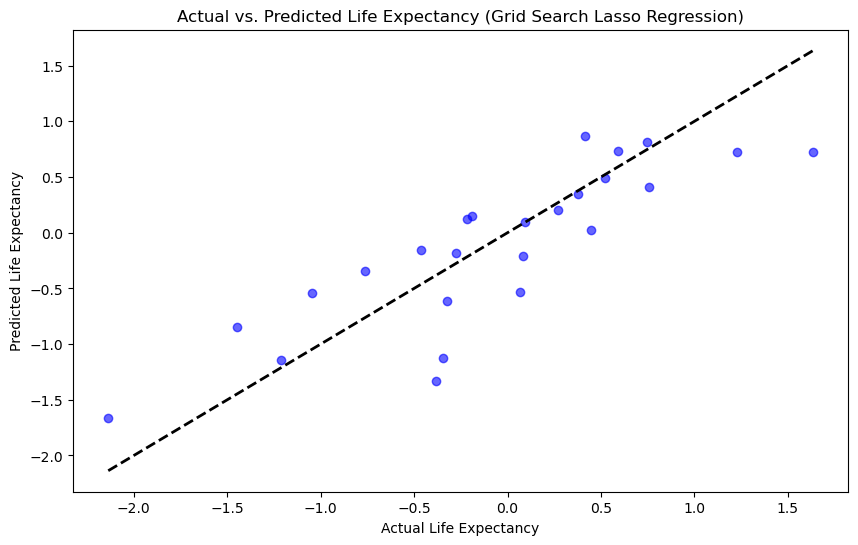

In [60]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lasso_grid.predict(X_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, color='blue', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs. Predicted Life Expectancy (Grid Search Lasso Regression)')
plt.show()


In [61]:
# Get the best Lasso model from the grid search
best_lasso_model = lasso_grid.best_estimator_

# Extract the coefficients and corresponding feature names
lasso_coefficients = best_lasso_model.coef_
feature_names = X.columns

# Create a DataFrame to store the coefficients and corresponding feature names
lasso_coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients
})

# Define a threshold to filter out features with coefficients close to zero
threshold = 0.05  # Adjust this threshold as needed

# Filter out the features with non-zero coefficients (important features)
important_features = lasso_coefficients_df[lasso_coefficients_df['Coefficient'] != 0]

# Filter out features with coefficients close to zero or with lower absolute coefficient values
important_features_filtered = important_features[abs(important_features['Coefficient']) >= threshold]


### Crucial Predictors Identified by GridSearchCV Lasso

In [62]:
print("Filtered Important Features and Coefficients:")
print(important_features_filtered)

Filtered Important Features and Coefficients:
               Feature  Coefficient
0      Adult_Mortality    -0.298900
4                 BMI      0.095274
7          Diphtheria      0.095783
8                  HIV    -0.407133
9                  GDP     0.137551
10          Population    -0.073702
11  Malnourished10_19     -0.133030
15   Status_Developing    -0.386962


In [63]:
# Drop the row corresponding to the 'Population' feature
important_features_filtered.drop(index=10, inplace=True)

In [64]:
important_features_filtered

,Feature,Coefficient
0,Adult_Mortality,-0.298900
4,BMI,0.095274
7,Diphtheria,0.095783
8,HIV,-0.407133
9,GDP,0.137551
11,Malnourished10_19,-0.133030
15,Status_Developing,-0.386962


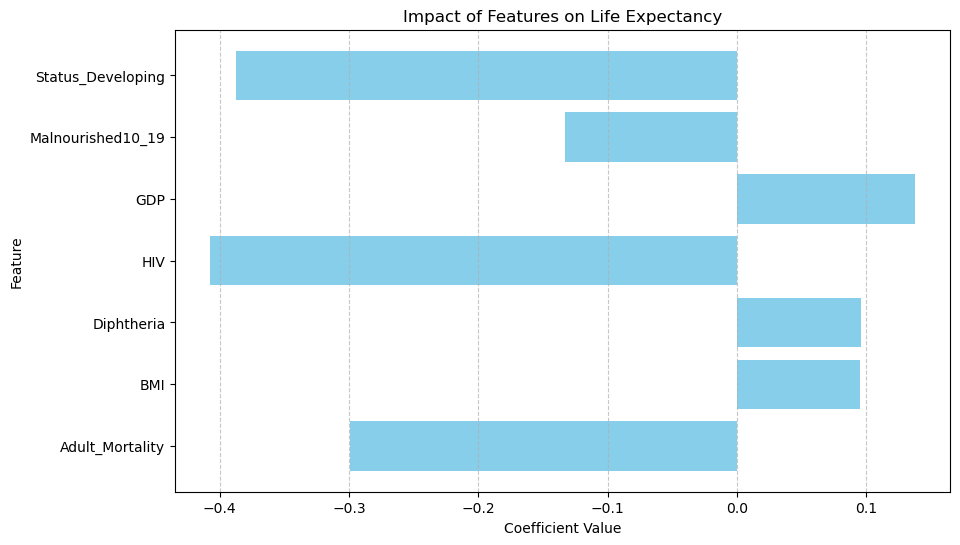

In [65]:
import matplotlib.pyplot as plt

# Define the features and their corresponding coefficients
features = ['Adult_Mortality', 'BMI', 'Diphtheria', 'HIV', 'GDP', 'Malnourished10_19', 'Status_Developing']
coefficients = [-0.298900, 0.095274, 0.095783, -0.407133, 0.137551, -0.133030, -0.386962]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Impact of Features on Life Expectancy')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Insights on Key Independent Variables Contributing to Life Expectancy (Y)

**Adult Mortality**: A decrease in adult mortality rate corresponds to an increase in life expectancy, indicating that effective healthcare interventions and disease management significantly impact life expectancy.

**BMI (Body Mass Index)**: Higher BMI values may suggest better nutrition and overall health, contributing positively to life expectancy. However, excessively high BMI values could indicate obesity-related health issues, potentially reducing life expectancy.

**Diphtheria Immunization Coverage**: Higher diphtheria immunization coverage indicates better public health infrastructure and vaccination programs, which can prevent infectious diseases and improve life expectancy.
HIV Prevalence: Higher HIV prevalence leads to a decrease in life expectancy due to increased mortality rates, underscoring the importance of HIV prevention, treatment, and public health initiatives.

**GDP (Gross Domestic Product) per Capita**: Countries with higher GDP per capita tend to have better access to healthcare, infrastructure, and resources, positively affecting life expectancy by improving living standards and healthcare services.

**Malnutrition (Age 10-19)**: Malnutrition among adolescents can lead to growth stunting, weakened immune systems, and increased susceptibility to diseases, negatively impacting life expectancy.

**Development Status (Developing)**: Countries classified as developing may face challenges such as inadequate healthcare infrastructure, poverty, and limited access to education, which can negatively affect life expectancy compared to developed countries.